<a href="https://colab.research.google.com/github/hvyrain/bigprobasic/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_Pandas_%EC%97%B0%EB%B9%84%EA%B3%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 알페온 연비 계산
- 2012년부터 기록해 온 실제 기록임

## 한글 글꼴 설치

In [ ]:
# 한글 글꼴 설치
import os
 
path = 'https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_MYUNGJO.zip' # 나눔명조
cmd = 'wget ' + path
os.system(cmd)

cmd = 'unzip ' + cmd[cmd.rfind('/')+1:] + ' -d /usr/share/fonts/truetype'
os.system(cmd)
# 나머지 작업, 반드시 런타임 다시 시작
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf # 실행 후 런타임 다시 시작 필요

In [1]:
import matplotlib.pyplot as plt
# 한글 처리
import matplotlib.font_manager as fm
ttf_path = '/usr/share/fonts/truetype/' + 'NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=ttf_path).get_name()
plt.rc('font', family=font_name, size=12)
print(font_name)

NanumMyeongjo


## 데이터 가져오기 및 정리

In [2]:
import pandas as pd
from datetime import datetime as dt

# 웹에 게시한 구글 스프레드시트로부터 가져오기
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTub3k4BtKZXK8Lxt0hFERZtsVPzuHlp2mHCJni92wJFKxiMZw1L8LYgfMfffpX3fQuGcr1hNYJXfHE/pub?gid=0&single=true&output=csv')
# 날짜,경과일,경과개월,간격일,계절,월,단가,수량,금액,주행거리,총주행거리,연비
# 데이터 정리
del df['경과일']
del df['간격일']
del df['계절']
del df['월']
df['금액'] = df['단가'] * df['수량']

## 월, 계절, 경과일, 간격일 다시 계산

In [3]:
# 0부터 마지막 제외 날짜 가져오기
days1 = list(map(lambda x: dt.strptime(x, '%Y. %m. %d'), df.iloc[:-1,0]))
# 1부터 마지막까지 날짜 가져오기
days2 = list(map(lambda x: dt.strptime(x, '%Y. %m. %d'), df.iloc[1:,0]))
# 날짜 차이와 계절을 구해서 리스트에 추가
diff = [0] # 날짜 간격
cum = [0]  # 경과 날짜
season = [((dt.strptime(df.iloc[0,0], '%Y. %m. %d').month)//3) % 4 + 1]
month = [dt.strptime(df.iloc[0,0], '%Y. %m. %d').month]

for i in range(len(days1)) :
    delta = days2[i] - days1[i]
    cumday = days2[i] - dt.strptime(df.iloc[0,0], '%Y. %m. %d')
    diff.append(delta.days)
    cum.append(cumday.days)
    seas = ((dt.strptime(df.iloc[i+1,0], '%Y. %m. %d').month)//3) % 4 + 1
    season.append(seas)
    month.append(dt.strptime(df.iloc[i+1,0], '%Y. %m. %d').month)
    
# df에 열 추가
df['경과일'] = cum
df['간격일'] = diff
df['계절'] = season
df['월'] = month
df

,날짜,경과개월,단가,수량,금액,주행거리,총주행거리,연비,경과일,간격일,계절,월
0,2012. 12. 13,0.0,1900,66.84,126996.00,NaN,23612,NaN,0,0,1,12
1,2012. 12. 23,0.3,1898,51.63,97993.74,416.0,24028,8.06,10,10,1,12
2,2012. 12. 31,0.6,1879,59.07,110992.53,539.0,24567,9.12,18,8,1,12
3,2013. 1. 8,0.9,1965,31.04,60993.60,210.0,24777,6.77,26,8,1,1
4,2013. 1. 12,1.0,1883,59.99,112961.17,626.0,25403,10.44,30,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
164,2021. 5. 17,102.6,1555,52.73,81995.15,334.0,85428,6.33,3077,19,2,5
165,2021. 6. 2,103.1,1555,51.45,80004.75,343.0,85771,6.67,3093,16,3,6
166,2021. 6. 21,103.7,1595,53.29,84997.55,353.0,86124,6.62,3112,19,3,6
167,2021. 7. 9,104.3,1614,50.19,81006.66,336.0,86460,6.70,3130,18,3,7


In [4]:
# 평균 주유 간격과 주행거리, 일 평균 주행거리
print('%.2f 일, %.2f km, %.2f km/일' % (df['간격일'].mean(), df['주행거리'].mean(), df['주행거리'].mean() / df['간격일'].mean()))

18.66 일, 376.27 km, 20.16 km/일


## 그래프 그려보기

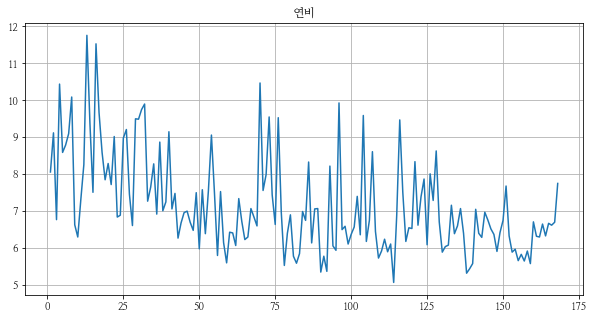

In [5]:
# 연비 그래프, 정보를 확인하기 힘들다.
df['연비'].plot(figsize=(10, 5), grid=True, title='연비')
plt.show()

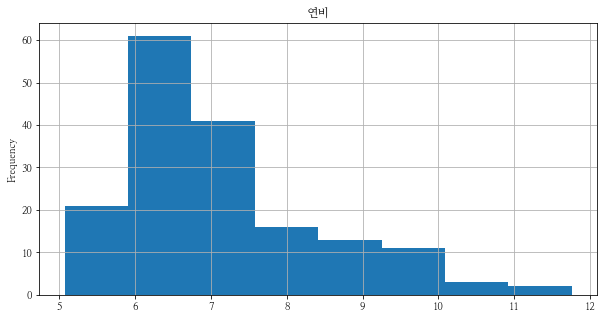

In [6]:
# 히스토그램
df['연비'].plot.hist(figsize=(10, 5), grid=True, title='연비', bins=8)
plt.show()

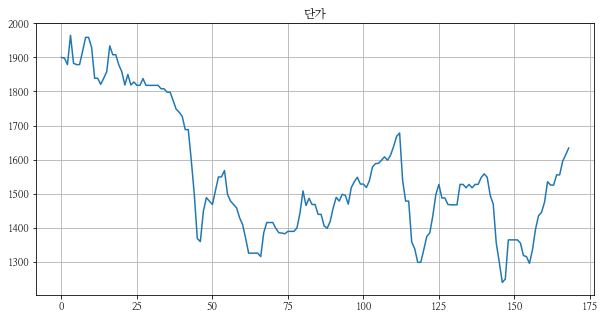

In [7]:
# 휘발유 리터당 단가(천원)
df['단가'].plot(figsize=(10, 5), grid=True, title='단가')
plt.show()

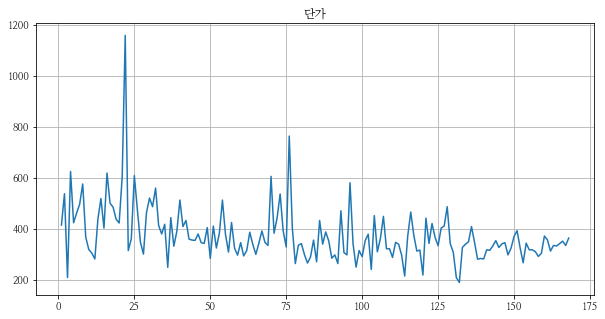

In [8]:
# 주행거리
df['주행거리'].plot(figsize=(10, 5), grid=True, title='단가')
plt.show()

### 월별 계절별 연비 평균

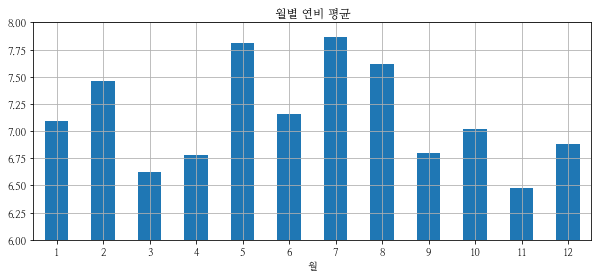

In [9]:
# 월별 평균 바그래프
# y 축 구간 설정
import math
mn = math.floor(df['연비'].groupby(df['월']).mean().min())
mx = math.ceil(df['연비'].groupby(df['월']).mean().max())
df['연비'].groupby(df['월']).mean().plot.bar(title='월별 연비 평균', grid=True, ylim=(mn, mx), figsize=(10,4), rot=0)
plt.show()

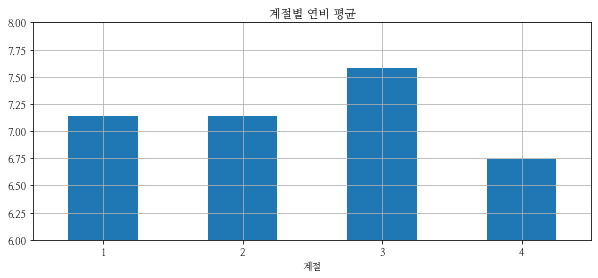

In [10]:
# 계절별 평균 바그래프
# y 축 구간 설정
import math
mn = math.floor(df['연비'].groupby(df['계절']).mean().min())
mx = math.ceil(df['연비'].groupby(df['계절']).mean().max())
df['연비'].groupby(df['계절']).mean().plot.bar(title='계절별 연비 평균', grid=True, ylim=(mn, mx), figsize=(10,4), rot=0)
plt.show()

### 월별 계절별 연비 박스플롯

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


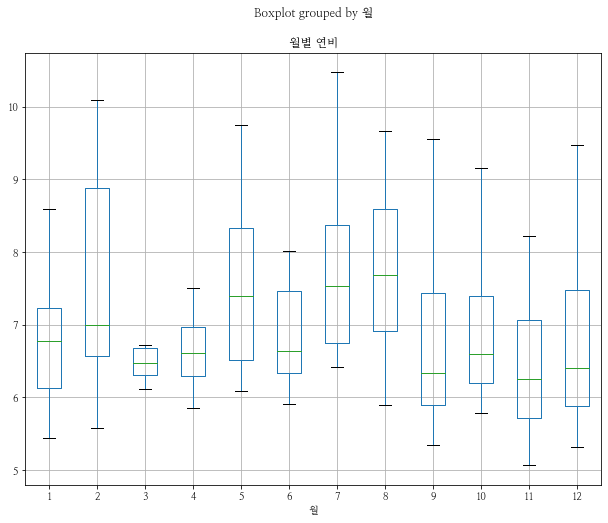

In [11]:
df.boxplot(column='연비', by='월', showfliers=False, grid=True, figsize=(10,8))
plt.title('월별 연비')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


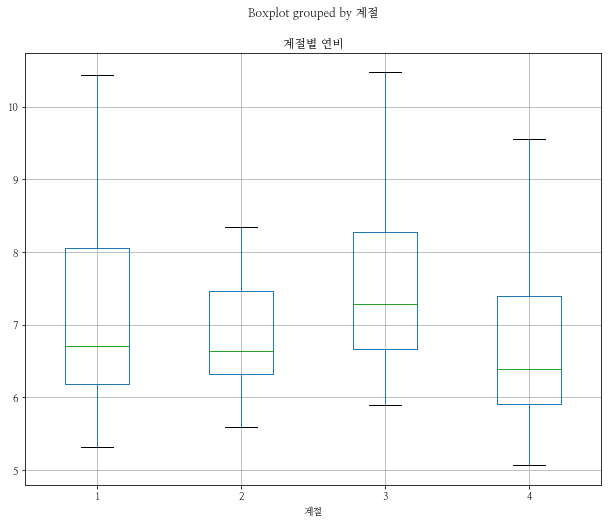

In [12]:
df.boxplot(column='연비', by='계절', showfliers=False, grid=True, figsize=(10,8))
plt.title('계절별 연비')
plt.show()